homework 3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Numpy

## Cosine Similarity
Calculate the cosine similarity of 2 vectors (as numpy arrays).

Give vector $\vec{\mu}$ and vector $\vec{v}$, the cosine similarity of them is 

$$S_{\vec{\mu}\vec{v}}=\frac{\vec{\mu}\cdot\vec{v}}{||\vec{\mu}||_2\times||\vec{v}||_2}$$

Where $||\cdot||_2$ is the L-2 norm.

**<font color='red'>Question:</font>**  Define a CosSim function, with inputs are two one-D arrays, and the output is their cosine similarity.

In [2]:
# your code here
def CosSim(u, v):
    return u.dot(v) / (np.sqrt(u.dot(u) * v.dot(v)))

In [3]:
# validate your results

x = np.linspace(-1,1,100)
y = np.linspace(1,-1,100)

print(
    """The cosine similarity between x and x is {:.5f}
The cosine similarity between x and y is {:.5f}
    """.format(CosSim(x,x), CosSim(x,y))
     )


The cosine similarity between x and x is 1.00000
The cosine similarity between x and y is -1.00000
    


## Linear Algebra

Solve the following Linear equation system:

$$
\begin{cases} 
4x+3y+2z=25\\ 
-2x+2y+3z=-10\\ 
3x-5y+2z=-4\\ 
\end{cases} 
$$

**<font color='red'>Question:</font>** Define a 2-d array $A$ and a 1-d array $b$ according to the above equation, which satisfy $AX=b$, where $X=(x, y, z)^T$

In [4]:
# your code here
A = np.array([[4,3,2],[-2,2,3],[3,-5,2]])
b = np.array([25,-10,-4])

print (A)
print (b)

[[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]
[ 25 -10  -4]


**<font color='red'>Question:</font>** Solve the equation, to get the values of $X$. 

Hint: you may use `numpy.linalg.inv()` to get the inverse of a matrix.

In [5]:
print(np.matmul(np.linalg.inv(A),b))

[ 5.  3. -2.]


# Baby Names Data Analysis

Load the ``baby_name_NY.txt`` dataset, which contains the baby names in New York city.

In [6]:
# load the data
column_names = ['State', 'Sex', 'Year', 'Name', 'Count']
babynames = pd.read_csv("./baby_name_NY.TXT", header=None, names=column_names)

babynames.head(5)

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


**<font color='red'>Question:</font>** What's the data types of each column?

In [7]:
babynames.dtypes

State    object
Sex      object
Year      int64
Name     object
Count     int64
dtype: object

**<font color='red'>Question:</font>** Find the most popular baby name in NY in 2018

In [8]:
print(babynames.loc[(babynames.Year == 2018) & (babynames.State == "NY")].sort_values("Count",ascending = False).head(1).values[0][3])

Liam


**<font color='red'>Question:</font>**  For female and male, what's the most popular baby names in 2017 respectively?

In [9]:
print("Female:",babynames.loc[(babynames.Sex == "F")].loc[(babynames.Year == 2017)].sort_values("Count",ascending = False).head(1).values[0][3])
print("Male:",babynames.loc[(babynames.Sex == "M")].loc[(babynames.Year == 2017)].sort_values("Count",ascending = False).head(1).values[0][3])

Female: Olivia
Male: Liam


**<font color='red'>Question:</font>** List all baby names that start with J.

In [10]:
for i in babynames.loc[((babynames.Name < "K") & (babynames.Name > "J"))]["Name"].unique():
    print(i)

Josephine
Jean
Julia
Jennie
Jane
Joan
Jeanette
Jessie
Jeanne
Jeannette
Janet
Johanna
June
Janice
Judith
Joyce
John
Jacqueline
Jenny
Jessica
Julie
Juliette
Juliet
Justina
James
Joseph
Juanita
Janette
Justine
Joanna
Jerry
Judy
Joanne
Jewel
Janina
Jayne
Josie
Joann
Joy
Juliana
Jannette
Jule
Josphine
Julianna
Janis
Jeane
Jeanie
Jo
Janeth
Jewell
Jack
Jocelyn
Jadwiga
Jeannie
Jacquelyn
Jill
Jacquelin
Janie
Jan
Jackie
Janith
Jacklyn
Julianne
Jay
Jeannine
Jetta
Jeanine
Joane
Josefina
Jeraldine
Johanne
Jannie
Jennifer
Joe
Janine
Jeri
Johann
Judie
Johnnie
Judi
Josette
Juliann
Joni
Jamie
Jerilyn
Jerilynn
Jerrilyn
Joellen
Jana
Jaclyn
Jerelyn
Jolene
Jerri
Joel
Joyceann
Judyann
Judyth
Joanann
Jody
Jacalyn
Joyanne
Jacquelyne
Jeanann
Jeanmarie
Juana
Janeen
Jaye
Joella
Johannah
Judithann
Janyce
Jacklynn
Julienne
Jacquline
Jeryl
Joanie
Jacqualine
Janelle
Jenifer
Jonnie
Jinny
Janey
Julieann
Joette
Jerrie
Jolie
Jacque
Jade
Jaime
Jann
Janna
Jodie
Jodi
Jose
Jasmine
Jacquelynn
Joelle
Jeralyn
Jude
Jacki
Joycel

**<font color='red'>Question:</font>** Sort names by their length, then print the top 5 by length.

In [11]:
# babynames.sort_values("Name",ascending = False,key = lambda x,y: len(x) < len(y) ? True : (len(x) > len(y) ? False : x <tyo y))

for i in sorted(babynames.Name.unique(), key = lambda x: -len(x))[:5]:
    print(i)


Michaelanthony
Maryelizabeth
Marycatherine
Samanthamarie
Oluwadarasimi


**<font color='red'>Question:</font>** Name whose popularity has changed the most.

**Hint**: First you may need to define change in popularity, i.e., for each name, you need to find the difference between the name's maximum occurrence and minimum occurrence. 

In [12]:
num = len(babynames)
name_map = {}

for i in range(num):
    record = babynames.iloc[i]
    name = record["Name"]
    ct = record["Count"]
    
    if (name in name_map):
        val = name_map[name]
        val["min"] = min(val["min"], ct)
        val["max"] = max(val["max"], ct)
    else:
        name_map[name] = {"min":ct, "max":ct}
        
max_change = 0
max_name = None 
for key, val in name_map.items():
    change = val["max"] - val["min"]
    if (change > max_change):
        max_change = change
        max_name = key
        
print("Name:", max_name, ", Change:", max_change)

Name: Robert , Change: 10020


# Single variable analysis

The `Salaries.csv` dataset contains the salaries of employees in San Francisco, see details [here](https://transparentcalifornia.com/salaries/san-francisco/).

**<font color='red'>Question:</font>** Read the data using pandas, save it as a Dataframe called `Salaries_df`

In [13]:
Salaries_df = pd.read_csv("Salaries.csv", index_col = "Id")

Salaries_df

,EmployeeName,TotalPayBenefits,Year
Id,,,
1,NATHANIEL FORD,567595.43,2011
2,GARY JIMENEZ,538909.28,2011
3,ALBERT PARDINI,335279.91,2011
4,CHRISTOPHER CHONG,332343.61,2011
5,PATRICK GARDNER,326373.19,2011
...,...,...,...
148650,Roy I Tillery,0.00,2014
148651,Not provided,0.00,2014
148652,Not provided,0.00,2014


In [14]:
Salaries_df["Year"].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

**<font color='red'>Question:</font>** Make a bar plot to show the number of DataRecords by year.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

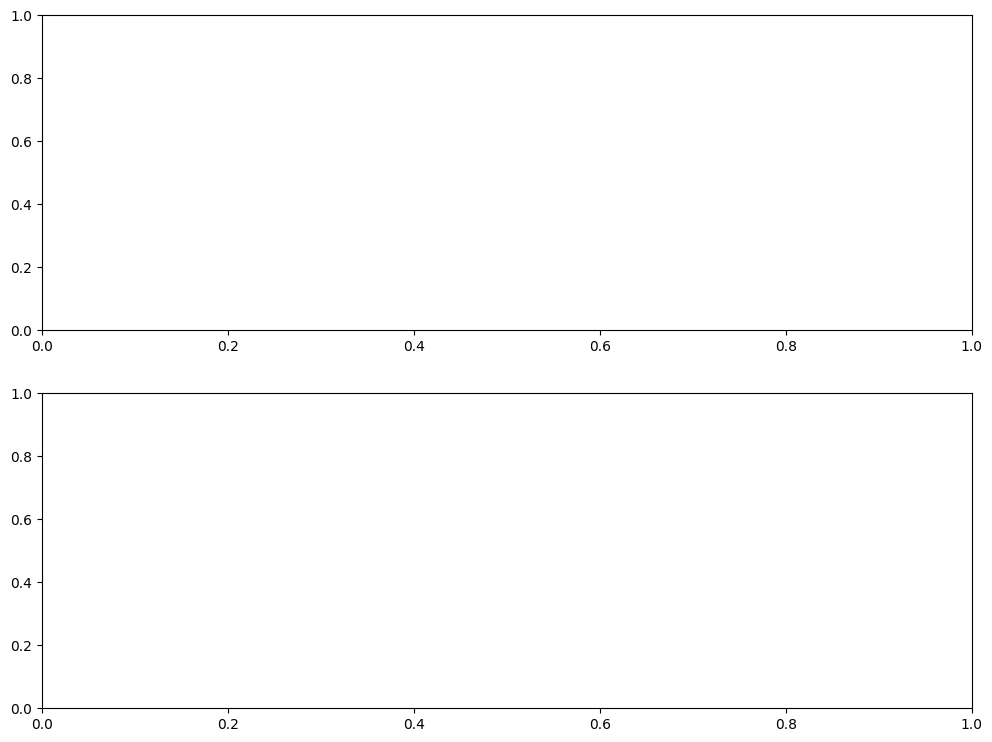

In [15]:
font = {"family":"Times New Roman","weight":"bold","size":12}

x = Salaries_df.sort_values("Year")["Year"].unique()
y1 = []
y11 = []
y12 = []
y13 = []
y14 = []
y2 = []
y3 = []
y4 = []
for i in x:
    y1.append(Salaries_df.loc[Salaries_df.Year == i]["Year"].count())
    y11.append(Salaries_df.loc[(Salaries_df.Year == i) & (Salaries_df.TotalPayBenefits < 865)]["Year"].count())
    y12.append(Salaries_df.loc[(Salaries_df.Year == i) & (Salaries_df.TotalPayBenefits < 10000)]["Year"].count())
    y13.append(Salaries_df.loc[(Salaries_df.Year == i) & (Salaries_df.TotalPayBenefits < 100000)]["Year"].count())
    y14.append(Salaries_df.loc[(Salaries_df.Year == i) & (Salaries_df.TotalPayBenefits < 500000)]["Year"].count())
    y2.append(Salaries_df.loc[Salaries_df.Year == i]["TotalPayBenefits"].max())
    y3.append(Salaries_df.loc[Salaries_df.Year == i]["TotalPayBenefits"].mean())
    y4.append(Salaries_df.loc[Salaries_df.Year == i]["TotalPayBenefits"].median())

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
   
ax1.grid(b = True,axis = "y")
ax1.set_xlabel('Year',font)
ax1.set_ylabel('Count',font)
ax1.bar(x, y1, width=0.2, color='#250250', label='Rich')
ax1.bar(x, y14, width=0.2, color='#EE3333', label='Middle Class')
ax1.bar(x, y13, width=0.2, color='#6699DD', label='Low Income')
ax1.bar(x, y12, width=0.2, color='#55AA33', label='Poor')
ax1.bar(x, y11, width=0.2, color='#FFFF33', label='Very Very Poor')
ax1.legend(loc='upper center',prop = font)
ax1.xaxis.set_major_locator(plt.MultipleLocator(1))
ax1.set_ylim(0,40000)
ax1.yaxis.set_major_locator(plt.MultipleLocator(5000))
ax1.set_title("Statistics on Employees' Salary",font)

ax2.grid(b = True,axis = "y")
ax2.set_xlabel('Year',font)
ax2.set_ylabel('Salary',font)
ax2.bar(x, y2, width=0.2, color='#250250', label='Max Salary')
ax2.bar(x+0.2, y3, width=0.2, color='#EE3333', label='Average Salary')
ax2.bar(x+0.4, y4, width=0.2, color='#25DEEE', label='Median Salary')
ax2.legend(loc='upper center',prop = font)
ax2.xaxis.set_major_locator(plt.MultipleLocator(1))
ax2.yaxis.set_major_locator(plt.MultipleLocator(50000))

**<font color='red'>Question:</font>** Make a histogram to show distribution of the variable `TotalPayBenefits`.

Text(0.5, 1.0, 'Distribution of TotalPayBenefits')

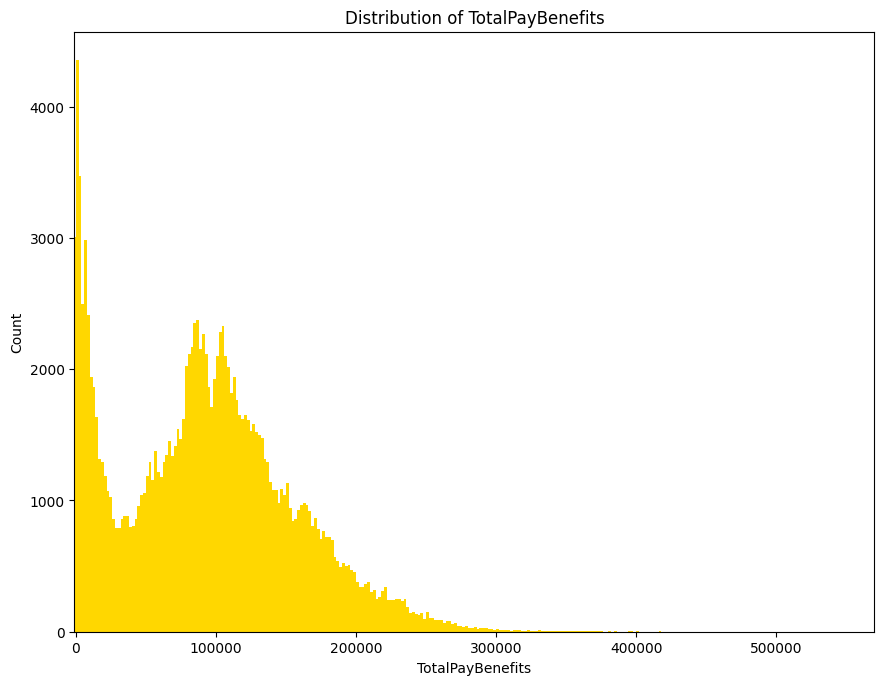

In [16]:
x = []
y = []
step = 2000
for i in range(-1000,570000,step):
    x.append(i)
for i in range(len(x)):
    y.append(Salaries_df.loc[(Salaries_df.TotalPayBenefits >= x[i]) & (Salaries_df.TotalPayBenefits < x[i] + step)]["TotalPayBenefits"].count())

fig = plt.figure(figsize=(8, 6))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)  
axes.bar(x,y,fc = "gold",width = step)
plt.xlim(-1000,570000)
axes.set_xlabel('TotalPayBenefits')
axes.set_ylabel('Count')
axes.set_title('Distribution of TotalPayBenefits')

**<font color='red'>Question:</font>** Calculate the (min, 1st quartile, median, 3rd quartile, max) of the variable `TotalPayBenefits`.

In [17]:
t = Salaries_df.sort_values("TotalPayBenefits")
t = t["TotalPayBenefits"]

print("min",t.iloc[0])
print("1st quartile",t.iloc[int(len(t) / 4)])
print("median",t.iloc[int(len(t) / 2)])
print("3st quartile",t.iloc[int(3 * len(t) / 4)])
print("max",t.iloc[int(len(t) - 1)])

min -618.13
1st quartile 44064.41
median 92405.97
3st quartile 132876.5
max 567595.43


**<font color='red'>Question:</font>** Make a box plot for the variable `TotalPayBenefits`.

Text(0.5, 1.0, 'Boxplot of TotalPayBenefits')

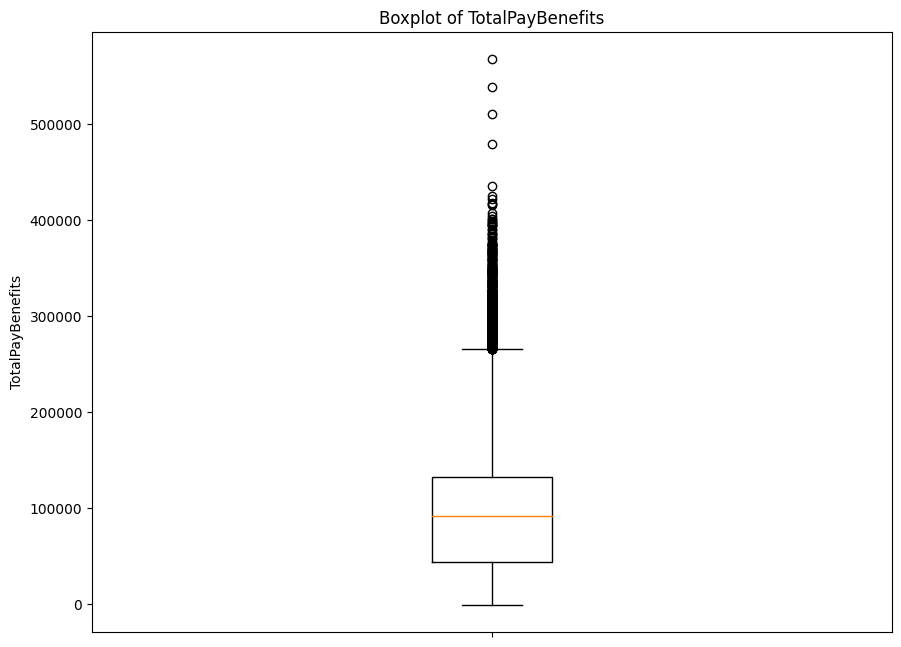

In [18]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.boxplot(t)
axes.set_ylabel('TotalPayBenefits')
axes.set_xticklabels('')
axes.set_title('Boxplot of TotalPayBenefits')

**<font color='red'>Question:</font>** What you can conclude from the box plot above?

Most of people hold a salary lower than 300,000￥, while there literally exists a handful of people have an extremely high salary.
Over a half of people(person-years) EVEN can't get a salary over 100,000￥ annually.

# The end